In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyam
import numpy as np
import matplotlib.ticker as mtick

<IPython.core.display.Javascript object>

## BP

https://www.bp.com/en/global/corporate/energy-economics/energy-outlook.html

In [2]:
df = pd.read_excel("data/bp-energy-outlook-2020-chart-data-pack.xlsx",
                  sheet_name = "Gas Share",
                  skiprows =3, index_col = "Scenarios")
df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2025,2030,2035,2040,2045,2050
Scenarios,,,,,,,,,,,,,,,,,,,,,
Rapid,0.179,0.187,0.193,0.196,0.202,0.205,0.208,0.215,0.218,0.221,...,0.232,0.236,0.233,0.234,0.256,0.257,0.232,0.188,0.144,0.129
Net Zero,0.179,0.187,0.193,0.196,0.202,0.205,0.208,0.215,0.218,0.221,...,0.232,0.236,0.233,0.234,0.216,0.174,0.103,0.056,0.041,0.045
Business-as-usual,0.179,0.187,0.193,0.196,0.202,0.205,0.208,0.215,0.218,0.221,...,0.232,0.236,0.233,0.234,0.240,0.241,0.236,0.225,0.214,0.203


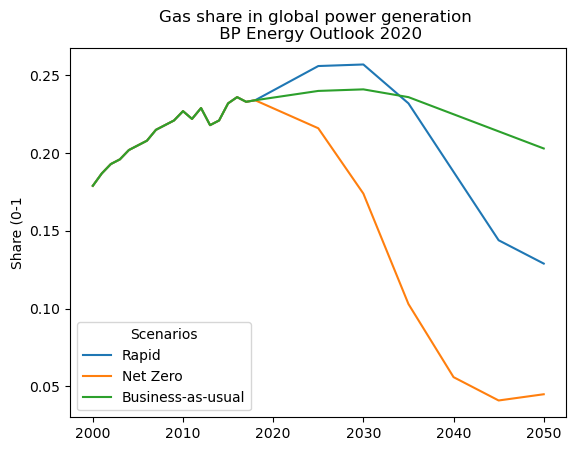

In [3]:
#fix, ax = plt.subplots()
df.T.plot()
plt.title("Gas share in global power generation \n BP Energy Outlook 2020")
plt.ylabel("Share (0-1")
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("figures/Gas share in global power generation BP Energy Outlook",
           dpi = 300)

plt.show()

## IEA

In [4]:
df = pd.read_excel("data/NZE2021_AnnexA.xlsx",
                  sheet_name = "World_Elec",
                  skiprows=4,
                  usecols=[0,1,2,3,4,5], 
                  index_col = "Fuels")
df = df.iloc[0:19]

#Take a subset of only gas-based generation
df = df.loc[["Unabated Natural gas","Natural gas with CCUS", "Total generation"]]
df=df.T
df

Fuels,Unabated Natural gas,Natural gas with CCUS,Total generation
2019,6314,0,26922
2020,6200.0,0.0,26778.0
2030,6222.0,170.0,37316.0
2040,626.0,694.0,56553.0
2050,253.0,669.0,71164.0


In [5]:
df["Unabated Natural gas share"] = df["Unabated Natural gas"]/df["Total generation"]
df["Natural gas with CCUS share"] = df["Natural gas with CCUS"]/df["Total generation"]
df

Fuels,Unabated Natural gas,Natural gas with CCUS,Total generation,Unabated Natural gas share,Natural gas with CCUS share
2019,6314,0,26922,0.234529,0.0
2020,6200.0,0.0,26778.0,0.231533,0.0
2030,6222.0,170.0,37316.0,0.166738,0.004556
2040,626.0,694.0,56553.0,0.011069,0.012272
2050,253.0,669.0,71164.0,0.003555,0.009401


In [6]:
df.to_excel("data/IEA Gas NZE.xlsx")

PermissionError: [Errno 13] Permission denied: 'data/IEA Gas NZE.xlsx'

In [ ]:
df.iloc[:,:2].plot(kind = "area", stacked = True)
plt.ylabel("TWh")
plt.title("Global Electricitiy Generation from Gas\n IEA Net Zero Scenario 2021")
plt.savefig("figures/Global electricity generation from gas in IEA Net Zero 2021 scenario", dpi = 300)
plt.show()

In [ ]:
df.iloc[:,3:].plot(kind = "area", stacked = True)
plt.ylabel("Share (0-1")
plt.title("Gas share in global electricitiy generation\n IEA Net Zero Scenario 2021")
plt.savefig("figures/Gas share in global electricity generation IEA Net Zero 2021 scenario", dpi = 300)
plt.show()

## Shell 

https://www.shell.com/energy-and-innovation/the-energy-future/scenarios/the-energy-transformation-scenarios.html#iframe=L3dlYmFwcHMvU2NlbmFyaW9zX2xvbmdfaG9yaXpvbnMv

In [ ]:
file = "data\shell-energy-transformation-scenarios-summary-data.xlsx"
shell = pd.read_excel(file, sheet_name = "Sheet1", skiprows = 23)
shell.columns=shell.iloc[0]

shell.drop(shell.index[0], axis=0, inplace=True)
shell.set_index("Scenarios",inplace=True)

shell.columns = shell.columns.astype(int)

shell= shell.T
shell

In [ ]:
shell.plot()
plt.title("Gas share in global electricity generation \n Shell Energy Transformation Scenarios 2021")
plt.ylabel("Share (0-1")
plt.xlabel("Years")
plt.savefig("figures/Gas share in global electricity generation Shell", dpi = 300)
plt.show()